In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("/content/retail_sales_dataset.csv")

In [ ]:
data.head()

Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100

In [ ]:
data.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [ ]:
data['Transaction ID'] = pd.to_numeric(data['Transaction ID'], errors='coerce')
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')
data['Total Amount'] = pd.to_numeric(data['Total Amount'], errors='coerce')

In [ ]:
data['Date'] = data['Date'].astype('category')
data['Gender'] = data['Gender'].astype('category')
data['Product Category'] = data['Product Category'].astype('category')
data['Quantity'] = data['Quantity'].astype('category')
data['Price per Unit'] = data['Price per Unit'].astype('category')

In [ ]:
data.head()

Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

  Quantity Price per Unit  Total Amount  
0        3             50           150  
1        2            500          1000  
2        1             30            30  
3        1            500           500  
4        2             50           100

In [ ]:
data.groupby('Gender')['Total Amount'].sum()

<ipython-input-67-c75d12f64086>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('Gender')['Total Amount'].sum()


Gender
Female    232840
Male      223160
Name: Total Amount, dtype: int64

In [ ]:
data.groupby('Product Category')['Total Amount'].mean()

<ipython-input-71-4fc294ed271a>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('Product Category')['Total Amount'].mean()


Product Category
Beauty         467.475570
Clothing       443.247863
Electronics    458.786550
Name: Total Amount, dtype: float64

In [ ]:
data.groupby('Product Category')['Total Amount'].sum()

<ipython-input-68-de66b7b9321a>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('Product Category')['Total Amount'].sum()


Product Category
Beauty         143515
Clothing       155580
Electronics    156905
Name: Total Amount, dtype: int64

In [ ]:
data.groupby("Product Category")["Age"].count().sort_values(ascending=False)

<ipython-input-70-ad2839f78ad5>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby("Product Category")["Age"].count().sort_values(ascending=False)


Product Category
Clothing       351
Electronics    342
Beauty         307
Name: Age, dtype: int64

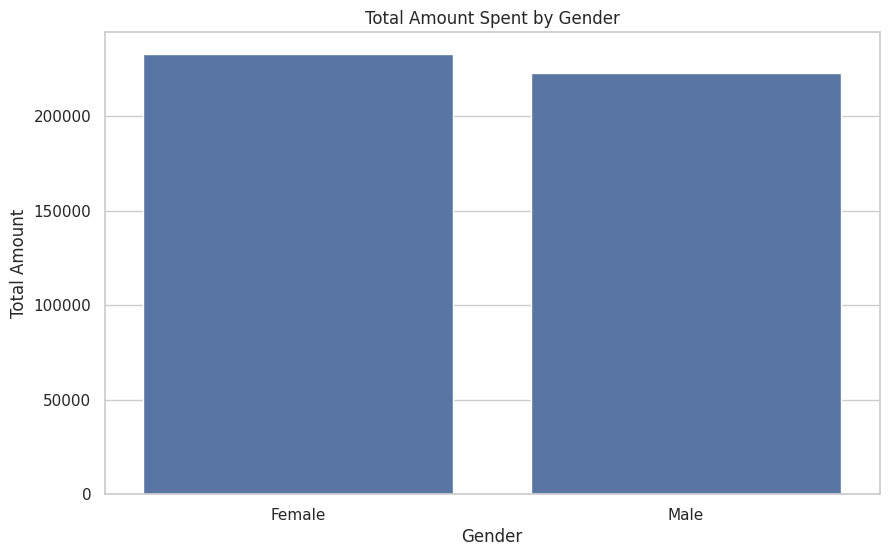

In [ ]:
sns.set(style="whitegrid")

# Plot total amount spent by Gender
plt.figure(figsize=(10, 6))
sns.barplot(x='Gender', y='Total Amount', data=data, estimator=sum, errorbar=None)
plt.title('Total Amount Spent by Gender')
plt.show()

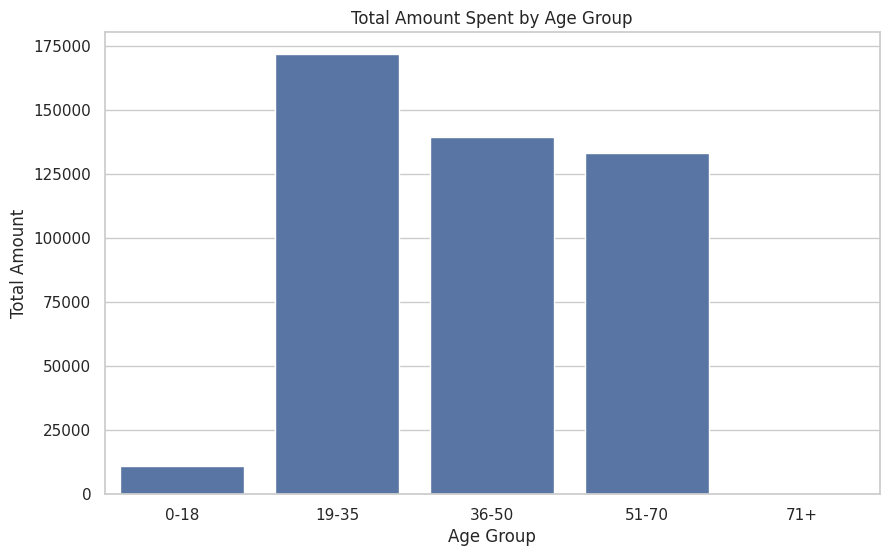

In [ ]:
data['Age Group'] = pd.cut(data['Age'], bins=[0, 18, 35, 50, 70, 100], labels=['0-18', '19-35', '36-50', '51-70', '71+'])
plt.figure(figsize=(10, 6))
sns.barplot(x='Age Group', y='Total Amount', data=data, estimator=sum, errorbar=None)
plt.title('Total Amount Spent by Age Group')
plt.show()

([0, 1, 2],
 [Text(0, 0, 'Beauty'), Text(1, 0, 'Clothing'), Text(2, 0, 'Electronics')])

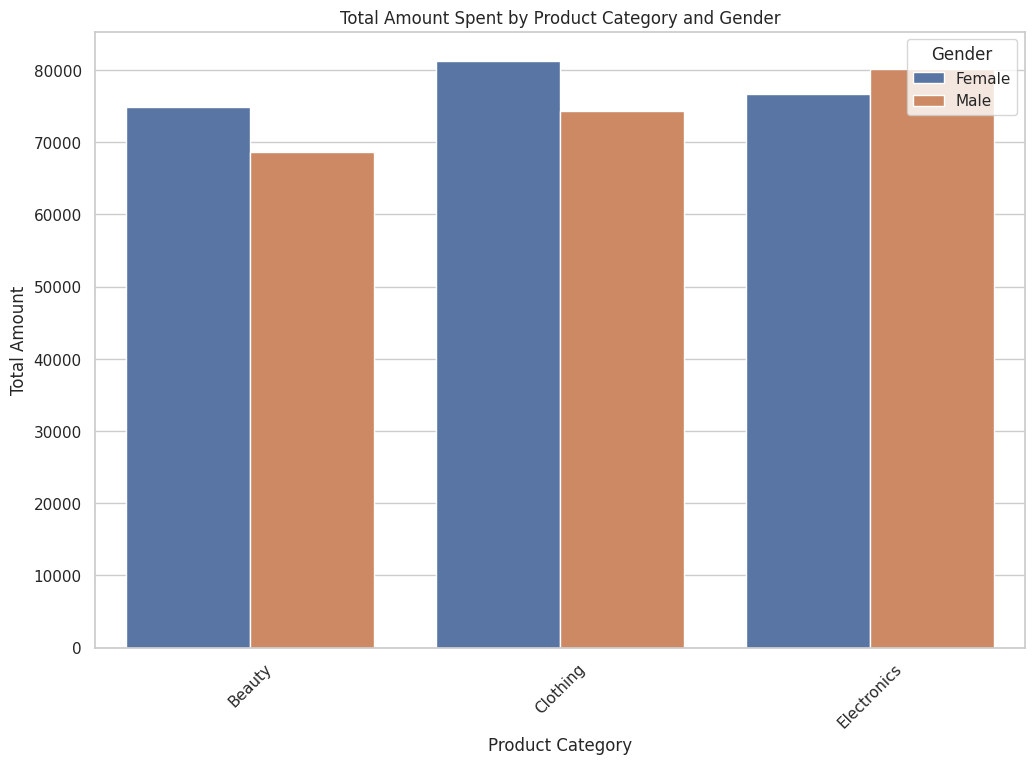

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Product Category', y='Total Amount', hue='Gender', data=data, estimator=sum, errorbar=None)
plt.title('Total Amount Spent by Product Category and Gender')
plt.xticks(rotation=45)

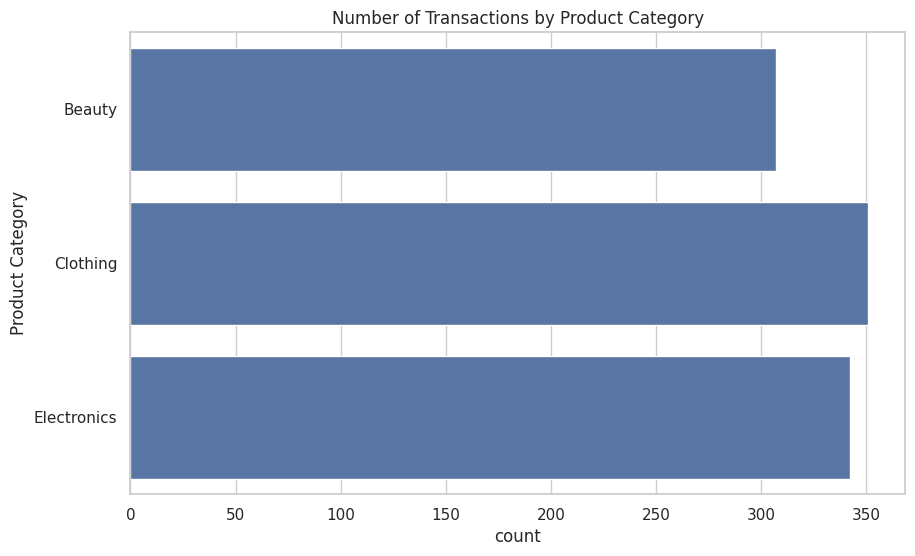

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Product Category', data=data)
plt.title('Number of Transactions by Product Category')
plt.show()

([0, 1, 2],
 [Text(0, 0, 'Clothing'), Text(1, 0, 'Electronics'), Text(2, 0, 'Beauty')])

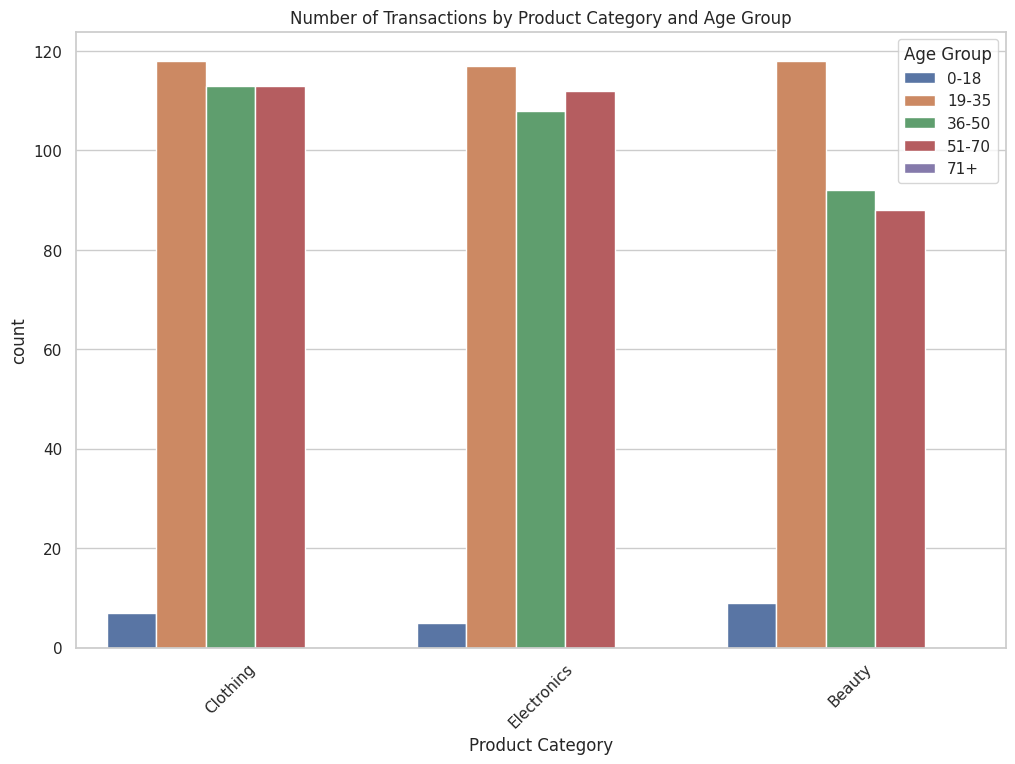

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(data=data, x='Product Category', hue='Age Group', order=data['Product Category'].value_counts().index)
plt.title('Number of Transactions by Product Category and Age Group')
plt.xticks(rotation=45)

<ipython-input-63-286ecd0c795e>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='Product Category', y='Total Amount', hue='Age Group', estimator=sum, ci=None, order=data['Product Category'].value_counts().index)


([0, 1, 2],
 [Text(0, 0, 'Clothing'), Text(1, 0, 'Electronics'), Text(2, 0, 'Beauty')])

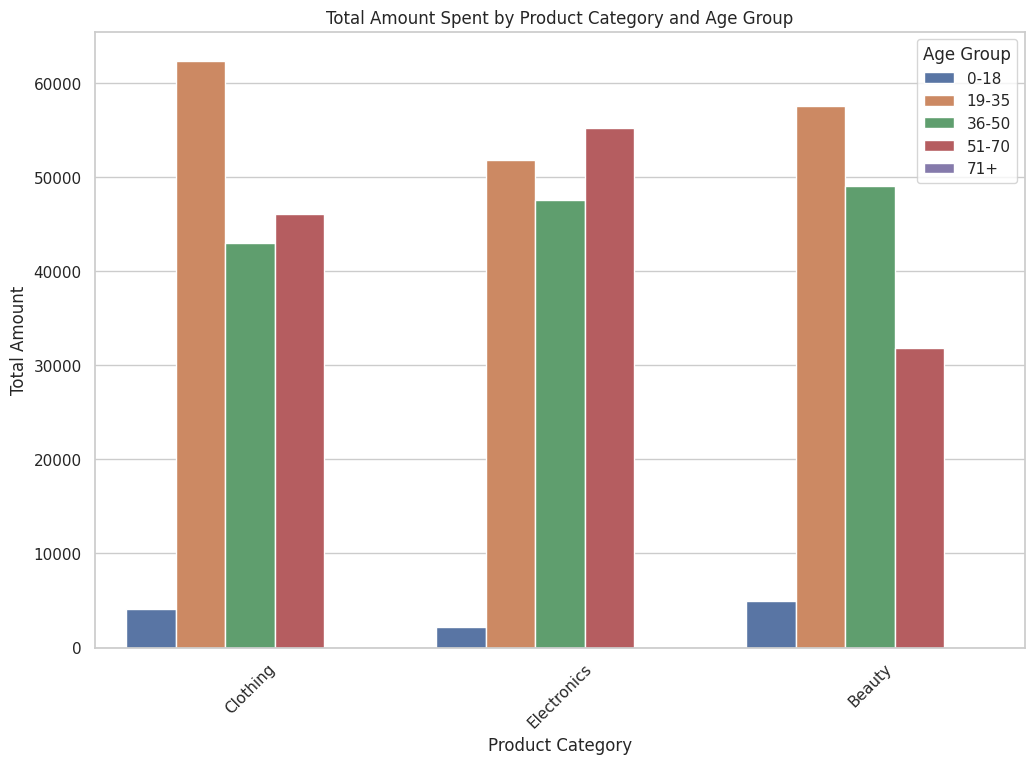

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(data=data, x='Product Category', y='Total Amount', hue='Age Group', estimator=sum, ci=None, order=data['Product Category'].value_counts().index)
plt.title('Total Amount Spent by Product Category and Age Group')
plt.xticks(rotation=45)

([0, 1, 2],
 [Text(0, 0, 'Clothing'), Text(1, 0, 'Electronics'), Text(2, 0, 'Beauty')])

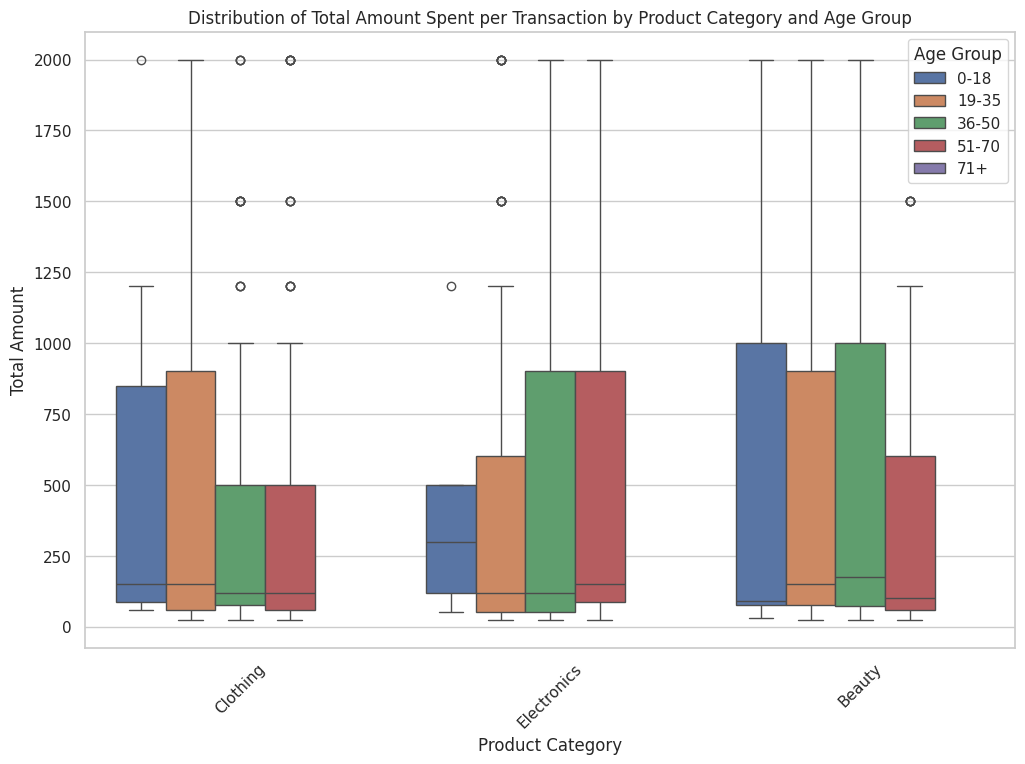

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, x='Product Category', y='Total Amount', hue='Age Group', order=data['Product Category'].value_counts().index)
plt.title('Distribution of Total Amount Spent per Transaction by Product Category and Age Group')
plt.xticks(rotation=45)

In [ ]:
!pip install scikit-surprise

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from surprise import Dataset, Reader, SVD, accuracy
from surprise.model_selection import train_test_split
import numpy as np

In [ ]:
data['Product Info'] = data['Product Category'].astype(str) + ' ' + data['Gender'].astype(str)
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(data['Product Info'])

In [ ]:
reader = Reader(rating_scale=(data['Total Amount'].min(), data['Total Amount'].max()))
surprise_data = Dataset.load_from_df(data[['Transaction ID', 'Product Category', 'Total Amount']], reader)
trainset, testset = train_test_split(surprise_data, test_size=0.2)

In [ ]:
svd_model = SVD()
svd_model.fit(trainset)

In [ ]:
predictions = svd_model.test(testset)

In [ ]:
rmse = accuracy.rmse(predictions)

RMSE: 1643.8196


In [ ]:
def get_recommendations(product_id, num_recommendations):
    cosine_similarities = linear_kernel(tfidf_matrix[product_id:product_id+1], tfidf_matrix).flatten()
    related_docs_indices = cosine_similarities.argsort()[-num_recommendations-1:-1][::-1]
    return data['Product Category'].iloc[related_docs_indices]

In [ ]:
example_product_id = 8  # Change this to any index you want to test
recommended_products = get_recommendations(example_product_id, 5)

print("Recommended products based on content:")
print(recommended_products)


Recommended products based on content:
630    Electronics
850    Electronics
592    Electronics
292    Electronics
288    Electronics
Name: Product Category, dtype: category
Categories (3, object): ['Beauty', 'Clothing', 'Electronics']
